# Avocado analysis 

# 1. Introduction

Import the necessary packages - basic EDA so no need for too many 

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from plotly import tools

Import the file as csv 

In [2]:
df = pd.read_csv('avocado.csv')

Initial analysis - checking what the data is

In [3]:
df.head(10)
df.tail(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18239,2,2018-03-11,1.56,22128.42,2162.67,3194.25,8.93,16762.57,16510.32,252.25,0.0,organic,2018,WestTexNewMexico
18240,3,2018-03-04,1.54,17393.30,1832.24,1905.57,0.00,13655.49,13401.93,253.56,0.0,organic,2018,WestTexNewMexico
18241,4,2018-02-25,1.57,18421.24,1974.26,2482.65,0.00,13964.33,13698.27,266.06,0.0,organic,2018,WestTexNewMexico
18242,5,2018-02-18,1.56,17597.12,1892.05,1928.36,0.00,13776.71,13553.53,223.18,0.0,organic,2018,WestTexNewMexico
18243,6,2018-02-11,1.57,15986.17,1924.28,1368.32,0.00,12693.57,12437.35,256.22,0.0,organic,2018,WestTexNewMexico
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


Check the date range that we have

In [4]:
df['Date'].max()


'2018-03-25'

In [42]:
df['Date'].min()

Timestamp('2015-01-04 00:00:00')

Check the datatypes for optimisation

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
Unnamed: 0      18249 non-null int64
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [7]:
# I noticed that the date is an object - convert to datetiime

df['Date'] =  pd.to_datetime(df['Date'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
Unnamed: 0      18249 non-null int64
Date            18249 non-null datetime64[ns]
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: datetime64[ns](1), float64(9), int64(2), object(2)
memory usage: 1.9+ MB


Null values

In [9]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

# 2. The analysis 

First step I like to create conditions that make it easier to filter data and make sure that the original dataframe remains untouched 

In [57]:
con_organic = df['type']=='organic'
con_conventional= df['type']=='conventional'

con_r_albany = df['region']=='Albany'
con_r_calif = df['region']=='California'
con_r_la = df['region']=='LosAngeles'

con_2015 = df['year']== 2015
con_2016 = df['year']==2016

In [11]:
type(con_r_albany)

pandas.core.series.Series

In [12]:
albany_df = df[con_r_albany]

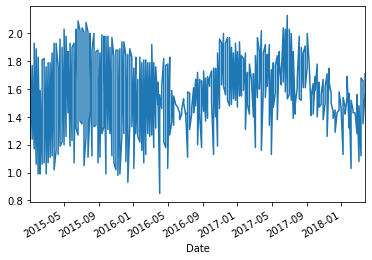

In [13]:
albany_df.set_index('Date',inplace=True)
albany_df['AveragePrice'].plot()

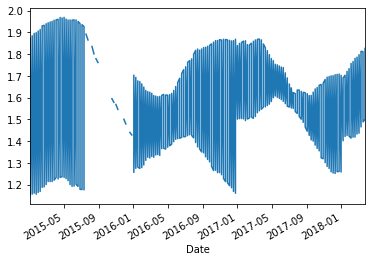

In [14]:
albany_df['AveragePrice'].rolling(25).mean().plot()

In [15]:
albany_df.sort_index(inplace=True)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



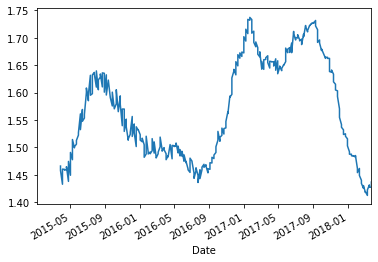

In [16]:
albany_df['AveragePrice'].rolling(25).mean().plot()

In [17]:
albany_df['price25ma']= albany_df['AveragePrice'].rolling(25).mean()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [18]:
albany_df.dropna(inplace=True)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [19]:
albany_df.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,price25ma
Date,,,,,,,,,,,,,,
2015-03-29,39,1.93,1082.44,24.75,173.26,0.00,884.43,884.43,0.00,0.00,organic,2015,Albany,1.4660
2015-03-29,39,1.02,67799.08,1402.28,58623.22,89.50,7684.08,7208.49,475.59,0.00,conventional,2015,Albany,1.4580
2015-04-05,38,1.16,47362.13,961.77,35577.66,93.76,10728.94,9869.16,755.61,104.17,conventional,2015,Albany,1.4328
2015-04-05,38,1.93,1526.10,15.75,202.52,0.00,1307.83,1307.83,0.00,0.00,organic,2015,Albany,1.4604
2015-04-12,37,1.76,1634.59,51.75,93.38,0.00,1489.46,1489.46,0.00,0.00,organic,2015,Albany,1.4600


In [20]:
df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

Let's compare two regions, and two years. Los Angelis and California (LA due to wealth California due to being a producer of avocados) 

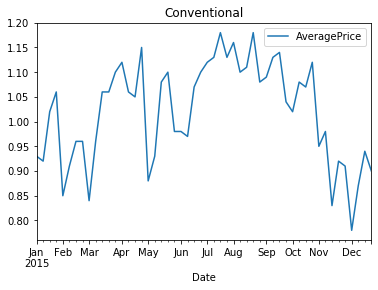

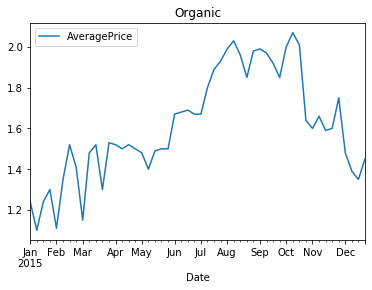

In [58]:
average_15_conv_calif = df[con_conventional & con_2015 & con_r_calif]
average_15_conv_calif.sort_values('Date')
average_15_conv_calif.plot(y='AveragePrice',x='Date', title='Conventional')

average_15_orga_calif = df[con_organic & con_2015 & con_r_calif]
average_15_orga_calif.sort_values('Date')
average_15_orga_calif.plot(y='AveragePrice',x='Date',title='Organic')

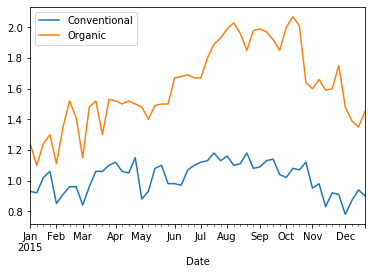

In [22]:
graph_15_conv_calif=average_15_conv_calif.plot(y='AveragePrice',x='Date',label='Conventional')
average_15_orga_calif.plot(ax=graph_15_conv_calif,y='AveragePrice',x='Date',label='Organic')

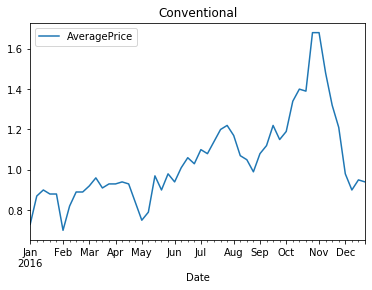

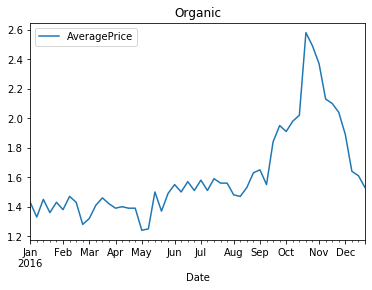

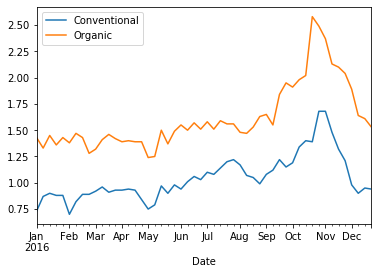

In [23]:
average_16_conv_calif= df[con_conventional & con_2016 & con_r_calif]
average_16_orga_calif = df[con_organic & con_2016 & con_r_calif]
average_16_conv_calif.sort_values('Date')
average_16_orga_calif.sort_values('Date')

average_16_conv_calif.plot(y='AveragePrice',x='Date', title='Conventional')
average_16_orga_calif.plot(y='AveragePrice',x='Date',title='Organic')

graph_16_conv_calif=average_16_conv_calif.plot(y='AveragePrice',x='Date',label='Conventional')
average_16_orga_calif.plot(ax=(graph_16_conv_calif),y='AveragePrice',x='Date',label='Organic')

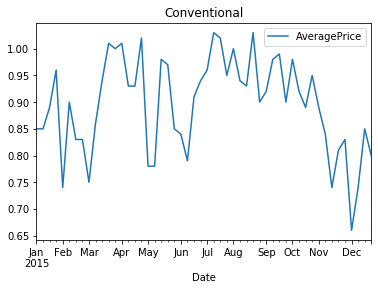

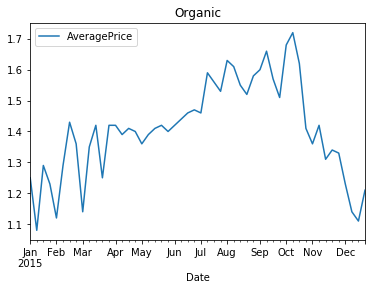

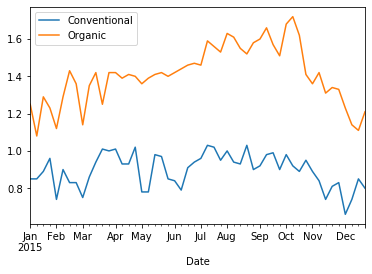

In [24]:
average_15_conv_la = df[con_conventional & con_2015 & con_r_la]
average_15_conv_la.sort_values('Date')
average_15_conv_la.plot(y='AveragePrice',x='Date', title='Conventional')

average_15_orga_la = df[con_organic & con_2015 & con_r_la]
average_15_orga_la.sort_values('Date')
average_15_orga_la.plot(y='AveragePrice',x='Date',title='Organic')


graph_15_orga_la=average_15_conv_la.plot(y='AveragePrice',x='Date',label='Conventional')
average_15_orga_la.plot(ax=graph_15_orga_la,y='AveragePrice',x='Date',label='Organic')

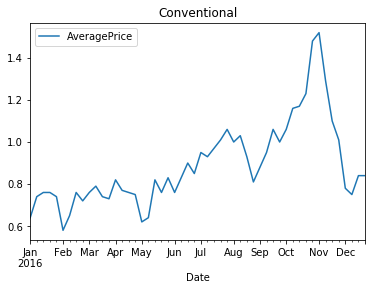

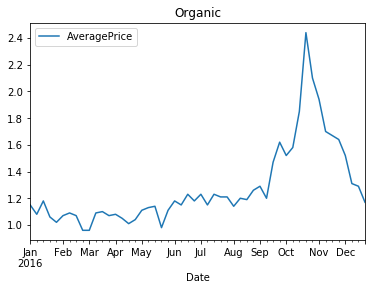

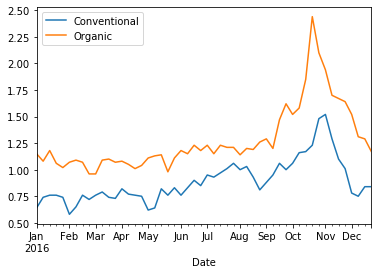

In [25]:
average_16_conv_la= df[con_conventional & con_2016 & con_r_la]
average_16_orga_la = df[con_organic & con_2016 & con_r_la]
average_16_conv_la.sort_values('Date')
average_16_orga_la.sort_values('Date')

average_16_conv_la.plot(y='AveragePrice',x='Date', title='Conventional')
average_16_orga_la.plot(y='AveragePrice',x='Date',title='Organic')

ax=average_16_conv_la.plot(y='AveragePrice',x='Date',label='Conventional')
average_16_orga_la.plot(ax=ax,y='AveragePrice',x='Date',label='Organic')


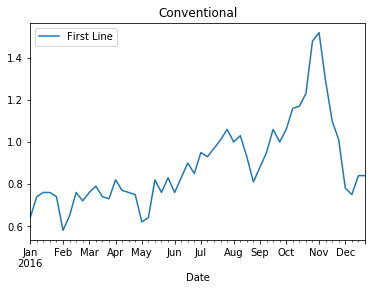

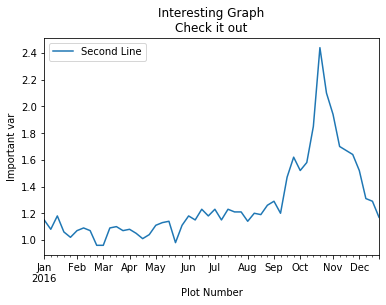

In [26]:
average_16_conv_la.plot(y='AveragePrice',x='Date', title='Conventional',label='First Line')
average_16_orga_la.plot(y='AveragePrice',x='Date',title='Organic',label='Second Line')




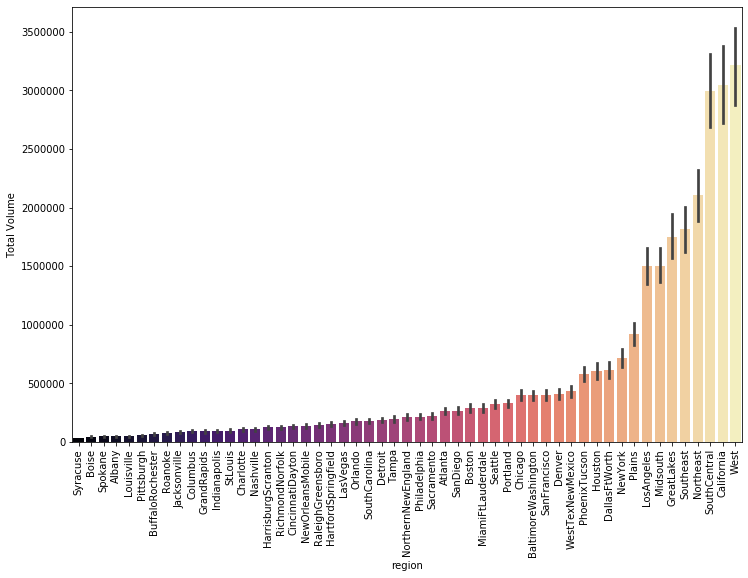

In [27]:
filter1=df.region!='TotalUS'
data1=df[filter1]

sorted_average = data1.groupby(["region"])['Total Volume'].aggregate(np.mean).reset_index().sort_values('Total Volume')

fig, ax = plt.subplots(figsize=(12, 8))
plt.xticks(rotation=90)
ax=sb.barplot(x='region',y='Total Volume', data=data1, palette='magma', order=sorted_average['region'])

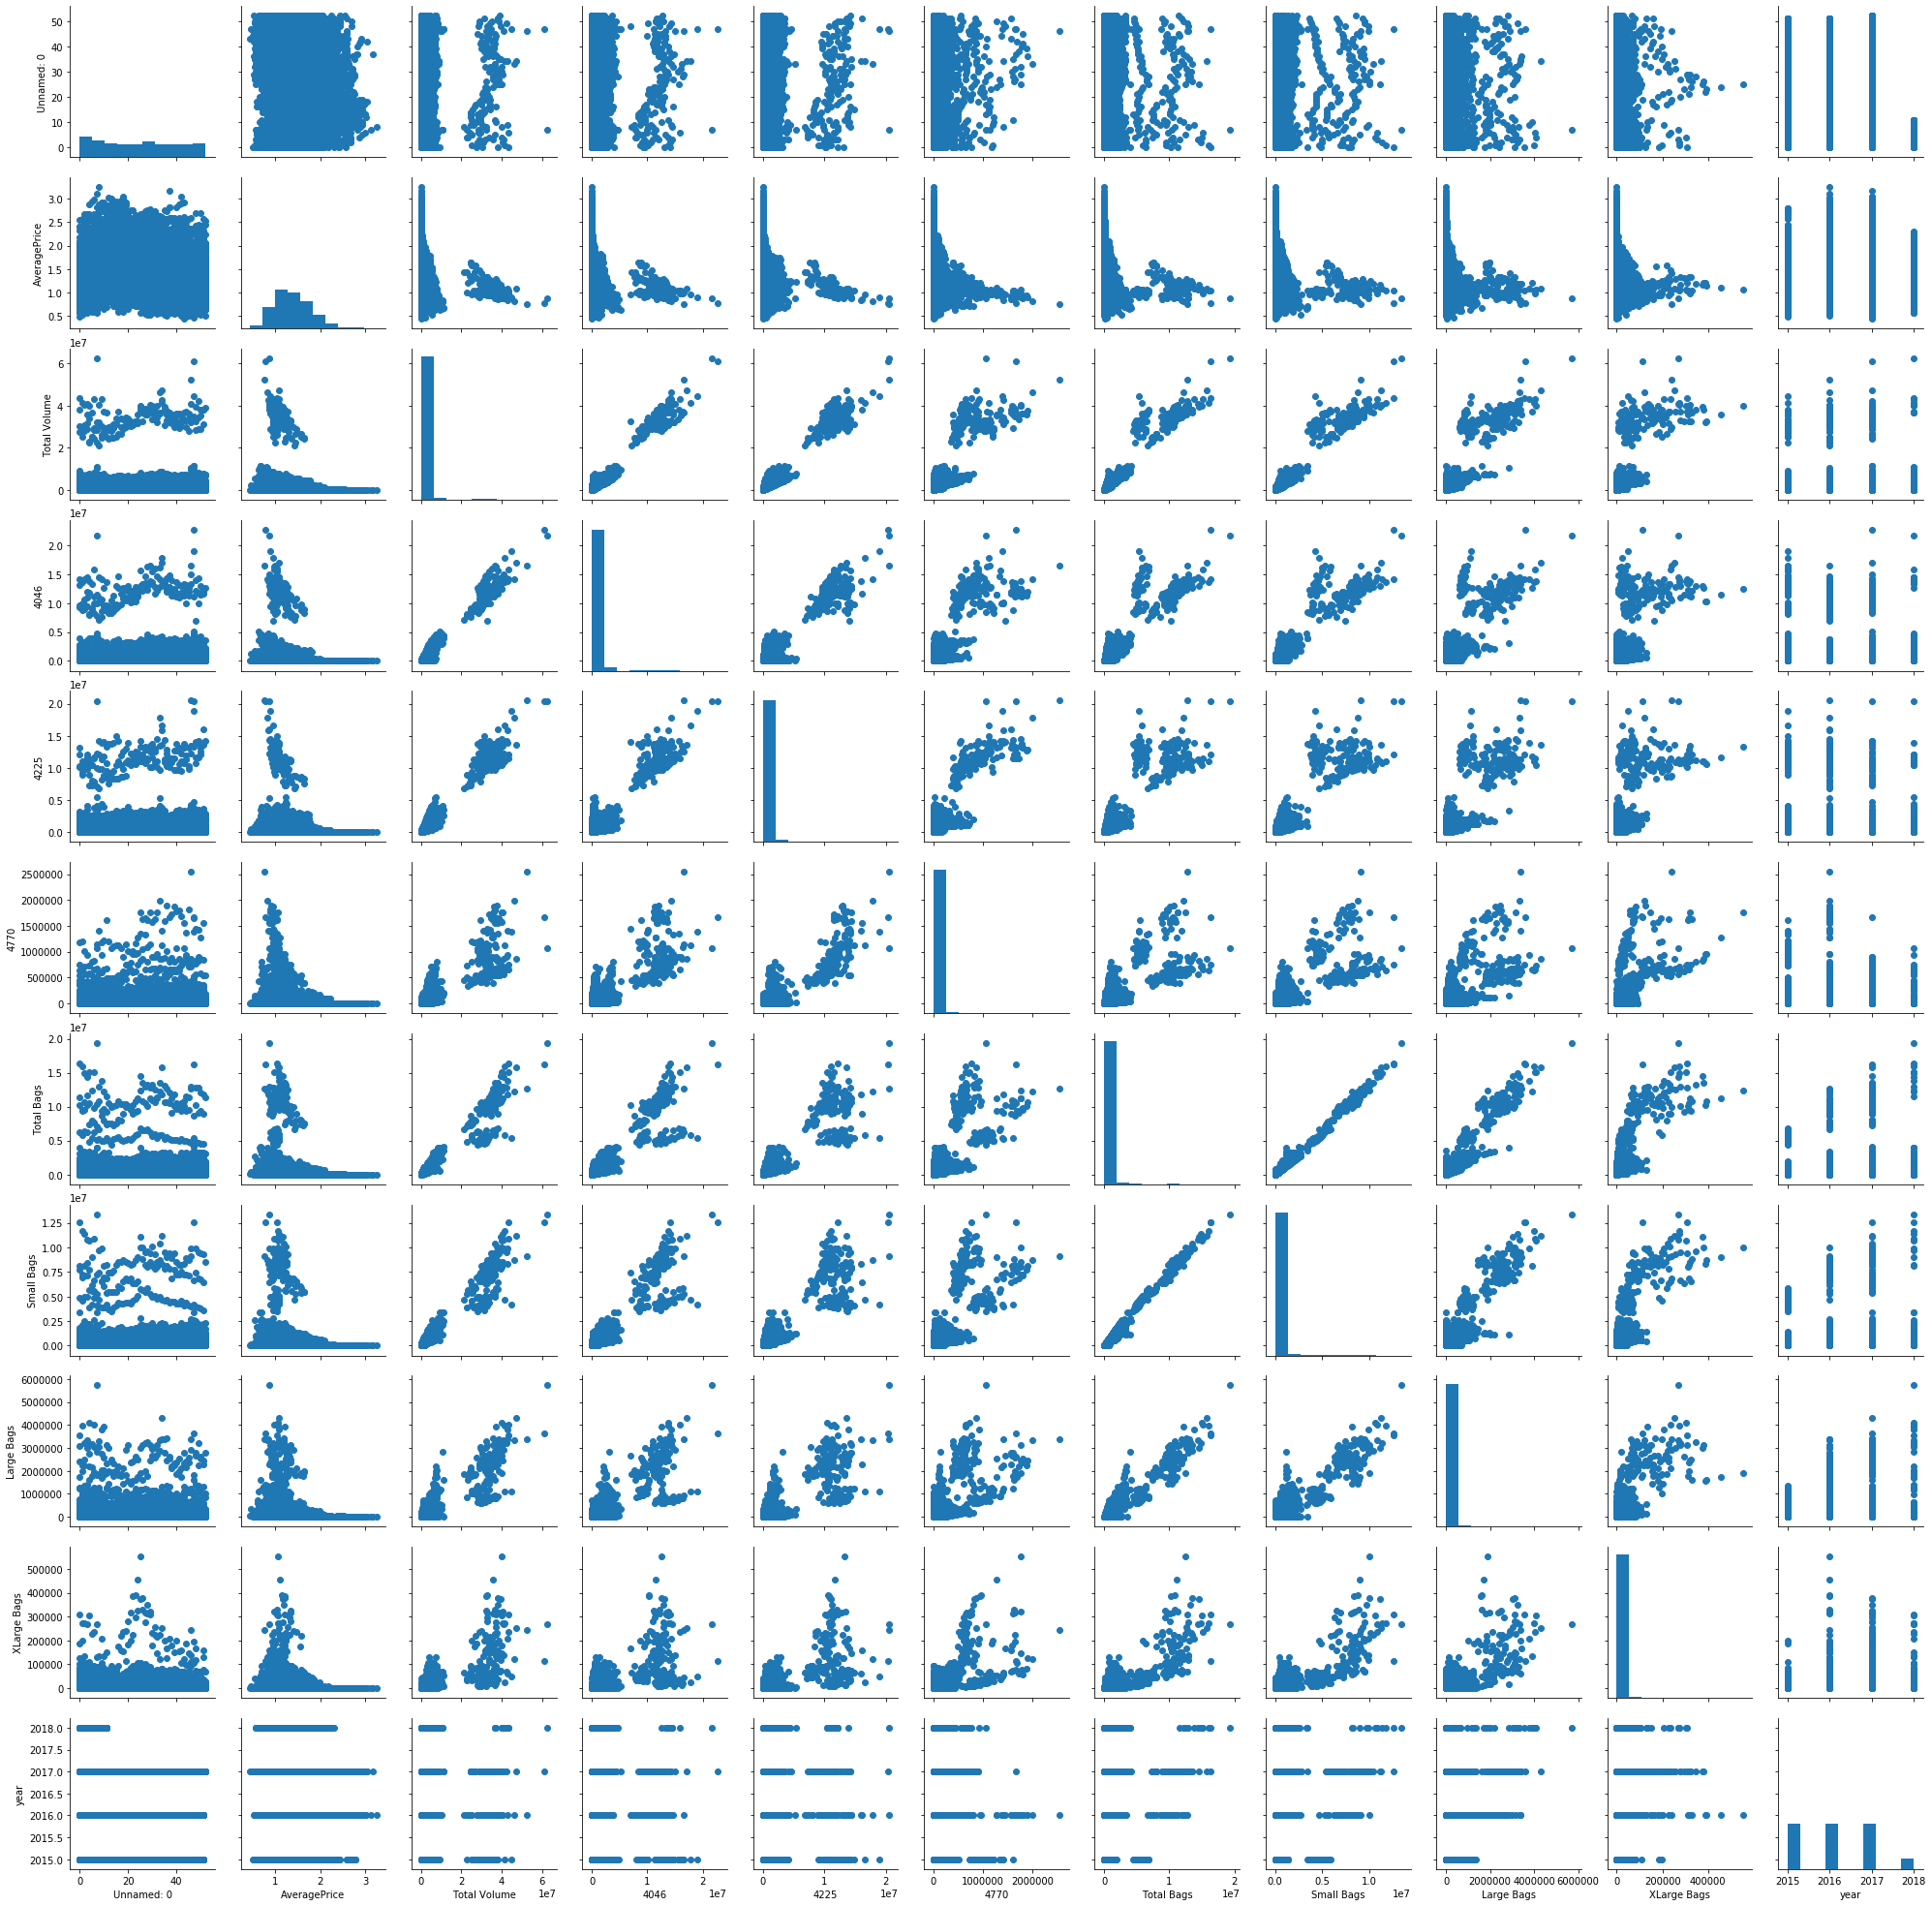

In [28]:
g = sb.PairGrid(df)
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter);

In [29]:
Type=df.groupby('type')['Total Volume'].agg('sum')

values=[Type['conventional'],Type['organic']]
labels=['conventional','organic']

trace=go.Pie(labels=labels,values=values)
py.iplot([trace])

In [31]:
df.groupby('year')['AveragePrice'].mean()

year
2015    1.375590
2016    1.338640
2017    1.515128
2018    1.347531
Name: AveragePrice, dtype: float64

In [32]:
price_by_year = df.groupby('year')['AveragePrice'].mean()

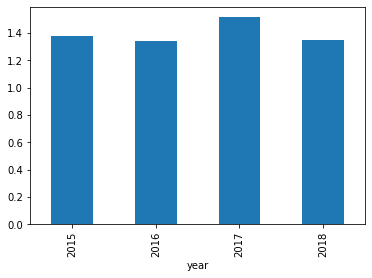

In [34]:
price_by_year.plot.bar()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 2 columns):
Date            18249 non-null datetime64[ns]
AveragePrice    18249 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 285.2 KB


In [74]:
average_15_conv_calif = average_15_conv_calif[['Date','AveragePrice']]
average_15_orga_calif= average_15_orga_calif[['Date','AveragePrice']]
average_15_orga_la = average_15_orga_la[['Date','AveragePrice']]
average_15_conv_la = average_15_conv_la[['Date','AveragePrice']]


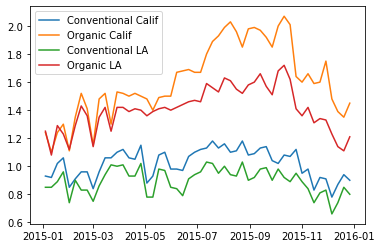

In [75]:
average_15_conv_calif_AveragePrice = average_15_conv_calif['AveragePrice']
average_15_orga_calif_AveragePrice = average_15_orga_calif['AveragePrice']
average_15_orga_la_AveragePrice = average_15_orga_la['AveragePrice']
average_15_conv_la_AveragePrice = average_15_conv_la['AveragePrice']


average_15_orga_calif_Date =  average_15_orga_calif['Date']

fig, ax = plt.subplots()
ax.plot(average_15_orga_calif_Date, average_15_conv_calif_AveragePrice, label="Conventional Calif")
ax.plot(average_15_orga_calif_Date, average_15_orga_calif_AveragePrice, label="Organic Calif")
ax.plot(average_15_orga_calif_Date,average_15_conv_la_AveragePrice,label='Conventional LA')
ax.plot(average_15_orga_calif_Date,average_15_orga_la_AveragePrice,label='Organic LA')

ax.legend()

plt.show()